**CSI 685 - Assignment 1**

Import data, original data is available here: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
The dataset was copied to my GitHub to make importing easier

In [1]:
import urllib.request
import os
datapath = os.path.join("datasets", "forestfires", "")
os.makedirs(datapath, exist_ok=True)
file_path = "https://raw.githubusercontent.com/robd123/AML/main/Project1/forestfires.csv"
urllib.request.urlretrieve(file_path, datapath + "forestfires.csv")

('datasets/forestfires/forestfires.csv',
 <http.client.HTTPMessage at 0x7f1628278a10>)

Convert data to array, commented out line removes all forest fires where the area is 0.  This has a slight effect on R2 score.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
forest_fires = pd.read_csv(datapath + "forestfires.csv", thousands=',')
#forest_fires = forest_fires[forest_fires['area'] > 0.00]


**Linear Regression - Temperature vs Area**

Split data, train the model and plot the data.  Also records the R2 and MSE scores.  
Data is plotted as the training set in blue, the test set in red, and the regression line as red.
Training set and test set are split randomly with 80% of the data points in the training set.

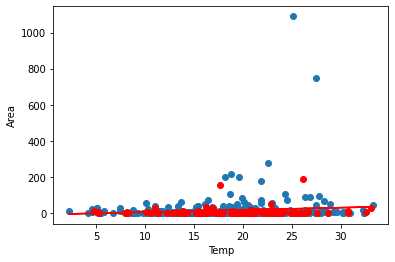

In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_vals = np.c_[forest_fires['temp']]
y_vals = np.c_[forest_fires['area']]

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=1234)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]

y_pred = lin_reg.predict(x_test)

mse_temp = mean_squared_error(y_test, y_pred)
r2_temp = r2_score(y_test, y_pred)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='r')
plt.plot(x_train, t0 + t1 * x_train, "r")
plt.xlabel("Temp")
plt.ylabel("Area")
plt.show()


**Linear Regression - Relative Humidity vs Area**

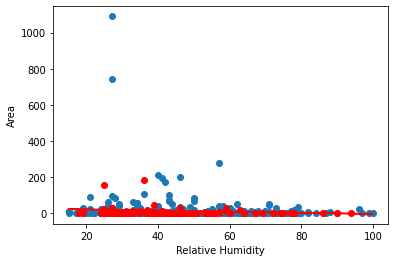

In [4]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_vals = np.c_[forest_fires['RH']]
y_vals = np.c_[forest_fires['area']]

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=1234)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]

y_pred = lin_reg.predict(x_test)

mse_rh = mean_squared_error(y_test, y_pred)
r2_rh = r2_score(y_test, y_pred)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='r')
plt.plot(x_train, t0 + t1 * x_train, "r")
plt.xlabel("Relative Humidity")
plt.ylabel("Area")
plt.show()


**Linear Regression - Wind vs Area**

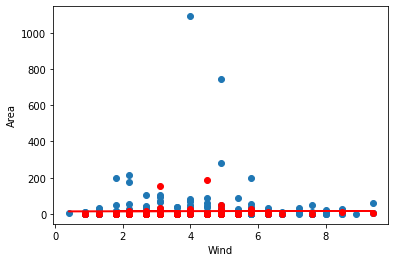

In [5]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_vals = np.c_[forest_fires['wind']]
y_vals = np.c_[forest_fires['area']]

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=1234)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]

y_pred = lin_reg.predict(x_test)

mse_wind = mean_squared_error(y_test, y_pred)
r2_wind = r2_score(y_test, y_pred)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='r')
plt.plot(x_train, t0 + t1 * x_train, "r")
plt.xlabel("Wind")
plt.ylabel("Area")
plt.show()

**Linear Regression - Rain vs Area**


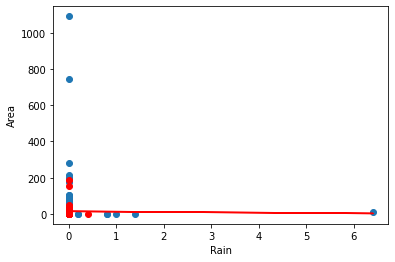

In [6]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_vals = np.c_[forest_fires['rain']]
y_vals = np.c_[forest_fires['area']]

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=1234)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]

y_pred = lin_reg.predict(x_test)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='r')
plt.plot(x_train, t0 + t1 * x_train, "r")
plt.xlabel("Rain")
plt.ylabel("Area")
plt.show()

mse_rain = mean_squared_error(y_test, y_pred)
r2_rain = r2_score(y_test, y_pred)


**Conclusion:**
  Temperature is the least accurate of all linear predictors of fire area.  However, this is a low bar and all linear regression models are very inaccurate.  This is likely due to the extremely high number of 0.00 area data points.  In the first code cell there is a commented out line to remove all fires that have zero burn area (does it count as a fire if it doesn't burn anything?), running regression this way slightly improves R2 score.  It appears, for this assignment, that linear regression using any of the data points (temperature, relative humidity, temperature, and rain) is not an effective way of predicting fire area.

In [7]:
print('Temp vs Area')
print('MSE: ' + str(mse_temp))
print('R2: ' + str(r2_temp))
print('Relative Humidity vs Area')
print('MSE: ' + str(mse_rh))
print('R2: ' + str(r2_rh))
print('Wind vs Area')
print('MSE: ' + str(mse_wind))
print('R2: ' + str(r2_wind))
print('Rain vs Area')
print('MSE: ' + str(mse_rain))
print('R2: ' + str(r2_rain))

Temp vs Area
MSE: 670.0305363263392
R2: -0.1398251702504758
Relative Humidity vs Area
MSE: 636.585362417621
R2: -0.08292977671576329
Wind vs Area
MSE: 643.0985040724767
R2: -0.09400963411497232
Rain vs Area
MSE: 645.4589247834641
R2: -0.09802507340153865
